<a href="https://colab.research.google.com/github/kai-neuhaus/3D_visualization_tools_review/blob/main/dysphoto_simulation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Using sagital cut through globular shaped cornea and calculate intersection points of ray segments.

Use explicit equation for lines

Solving quadratic equation to get intersection points



# Version History
v2 ... base trunk implementing quadtratic equation

v2-0-1 ... branch from base trunk (copy from v2)

v2-0-2 ... ray segment CA

v2-0-3 ... annotating and create relase r2-0-3

v2-0-4 ... automatic fitting

th3 40.240732218475934
th2 38.84942540656115
th1 59.95594451697134


<ipython-input-28-9b218b85471c>:41: RuntimeWarning: invalid value encountered in sqrt
  y = np.sqrt(R**2 - (x-ox)**2) + oy


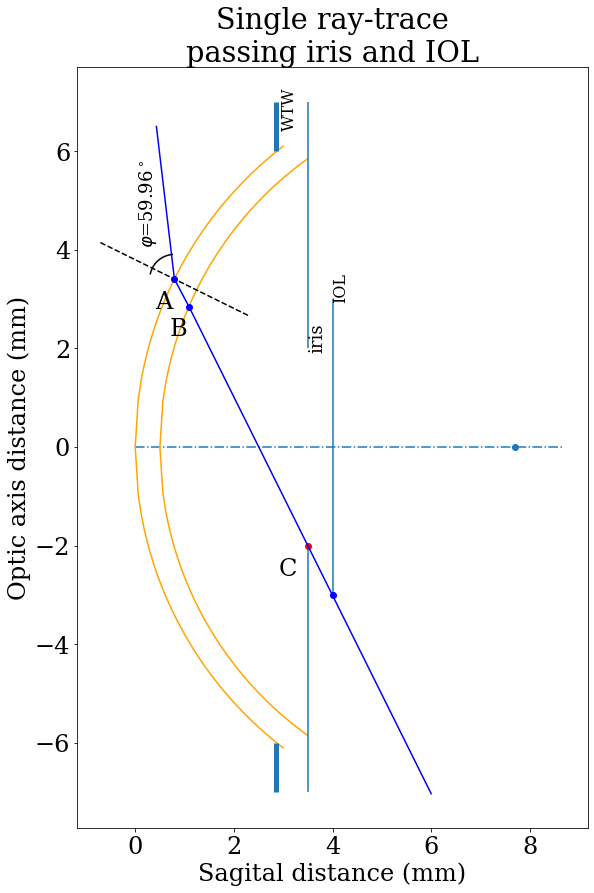

In [ ]:
#@title Only ray segment CA to inner circular cornea --> confirm accurate computation { form-width: "40%" }
# v2-0-3
'''
Please note that the operations are kept explicit and are not all encapsulated into function calls.
For this code version this is to allow the testing and evaluation of further operations required for future requests.
Consequently, many commands are repeated explicitly for each intersection point.
A follow up code review will simplify and place code sequences into function bodies.
'''
import numpy as np
import scipy as sp
import matplotlib
import matplotlib.pyplot as pp

WTW = 12  #@param {type:"number"}
pupil = 4  #@param {type:"number"}
cornea_thickness = 0.5 #@param {type:"number"}
cornea_outer_radius = 7.7 #@param {type:"number"}
cornea_inner_radius = cornea_outer_radius - cornea_thickness
distance_cornea_iris = 3 #@param {type:"number"}
distance_iris_to_IOL = 0.5 #@param {type:"number"}
diameter_IOL = 6.0 #@param {type:"number"}
refractive_index_air = 1.0 #@param {type:"number"}
refractive_index_cornea = 1.38 #@param {type:"number"}
refractive_index_anterior_chamber = 1.34 #@param {type:"number"}

n1 = refractive_index_air
n2 = refractive_index_cornea
n3 = refractive_index_anterior_chamber

WTW_r = WTW/2
d_iiol = distance_iris_to_IOL
pup_r = pupil/2
c_th = cornea_thickness
d_ci = distance_cornea_iris

# Arbitrary point chosen to find cut-off condition to be defined
set_Y_point = 2.85

def circle(x,R,ox,oy):
  # draw circle base on shifting x coordinate. Not angle.
  y = np.sqrt(R**2 - (x-ox)**2) + oy
  return {'x':x, 'y':y}

OI_x = cornea_outer_radius # absolute position also for inner radius if the same
OI_y = 0.0 # assume on optical axis
OI_circle_x = np.linspace(c_th, c_th+3.0) # arbitrar x range to visualize
OI_circle = circle(OI_circle_x, cornea_inner_radius,OI_x,OI_y)
OO_x = cornea_outer_radius
OO_y = 0.0 # assume on optical axis
OO_circle_x = np.linspace(0.0, 0.0 + 3.0)
OO_circle = circle(OO_circle_x, cornea_outer_radius,OO_x,OO_y)

# Point C coordinates
C_x = c_th + d_ci
C_y = -pup_r

# B_x = # calculate using intersection
B_y = set_Y_point # arbitrary --> later in conjunction with WTW

# Parameters for quadratic equation
def find_intersection(x0,y0,x1,y1,ox,oy,r):
  # we keep all parameters for evaluation. This is not considered a genarlized function.
  # The results are specific to the intersection. The alternative results are for evaluation of future generalization.
  a = (x1-x0)**2 +(y1-y0)**2
  b = 2*(x1-x0)*(x0-ox) + 2*(y1-y0)*(y0-oy)
  c = (x0-ox)**2 + (y0-oy)**2 - r**2
  t1 = (-b + np.sqrt(b**2 - 4*a*c))/(2*a)
  t2 = (-b - np.sqrt(b**2 - 4*a*c))/(2*a)
  t3 = (2*c) / (-b + np.sqrt(b**2 - 4*a*c))
  t4 = (2*c) / (-b - np.sqrt(b**2 - 4*a*c))
  x_t1 = (x1-x0)*t1 + x0
  x_t2 = (x1-x0)*t2 + x0
  x_t3 = (x1-x0)*t3 + x0
  x_t4 = (x1-x0)*t4 + x0
  return [x_t1, x_t2, x_t3, x_t4]

x_ts = find_intersection(0.0, B_y, OI_x, B_y, OI_x, OI_y, cornea_inner_radius)
B_x = x_ts[1] # use end point directly. Do not need to calculate B_x at x_ts

# incidence angle inner cornea at Point B relative to a vertical line
ang_OI_B = np.arctan((OI_x - B_x) / (B_y - OI_y))
ang_C_B = np.arctan((C_x - B_x)/(np.abs(C_y) + B_y))
th3 = ang_OI_B - ang_C_B # the normal angle vs vertical and incidence angle vs normal ... the diff is angle vs normal
print('th3',np.rad2deg(th3))

# refract ray CB to BA
# n3*sin(th3) = n2*sin(th2)
th2 = np.arcsin(n3/n2*np.sin(th3))
print('th2',np.rad2deg(th2))
ang_B_A = ang_OI_B - th2 + np.pi/2
# make line BA to get second point on BA
m_BA = np.tan(ang_B_A)
c_BA = B_y - B_x * m_BA
x_BA = 0.0 # arbitrary to get some point somewhere
y_BA = x_BA * m_BA + c_BA
x_BA2 = B_x # arbitrary to get some point somewhere
y_BA2 = x_BA2 * m_BA + c_BA


# find intersect of ray BA with outer cornea
x_A_ts = find_intersection(B_x, B_y, x_BA, y_BA, OO_x, OO_y, cornea_outer_radius)

# extend ray BA to point A
A_x = x_A_ts[0]
A_y = A_x * m_BA + c_BA
# A_y = x_A_ts[1] * m_BA + c_BA

# refract ray BA to A->air
# We assume that the opposite angle at the outer radius is the same as the refracted angle at point B
# If this is inaccurate we have to follow up
# n2*sin(th2) = n1*sin(th1)
th1 = np.arcsin(n2/n1*np.sin(th2)) #+ np.deg2rad(13)
print('th1',np.rad2deg(th1))

ang_A_air = ang_OI_B - th1 + np.pi/2 # todo: Compute the incidence normal for beam segment BA. Using CB normal for test here only.
# make line A_air to get second point on A_air
m_A_air = np.tan(ang_A_air)
c_A_air = A_y - A_x * m_A_air
# x_A_air = 0.2 # arbitrary to get some point somewhere
# y_A_air = x_A_air * m_A_air + c_A_air
y_A_air = 6.5
x_A_air = (y_A_air - c_A_air)/m_A_air

# make line and extend ray CB to IOL
m_CB = (C_y-B_y)/(C_x-B_x)
c_CB = C_y
x_CB = d_iiol*5
x_CB = x_CB + (c_th + d_ci)
y_CB = (x_CB - (c_th + d_ci)) * m_CB  + c_CB

# make normal segment OI to A
m_NA = (OI_y-A_y)/(OI_x-A_x)
c_NA = A_y - A_x * m_NA
x_NA1 = -1.5
x_NA1 = x_NA1 + A_x
y_NA1 = x_NA1 * m_NA + c_NA
x_NA2 = 1.5
x_NA2 = x_NA2 + A_x
y_NA2 = x_NA2 * m_NA + c_NA
# draw circle segment to visualize angle phi
A_circle_x = np.linspace(0.0, 0.0 + 0.75)
A_circle = circle(x=A_circle_x, R=0.5,ox=A_x,oy=A_y)


matplotlib.rcParams.update({'font.serif': 'DejaVu Serif'})
matplotlib.rcParams.update({'font.family': 'serif'})
matplotlib.rcParams.update({'font.size': 24})

pp.figure(num='Curved Cornea v2-0-2', figsize=[14,14])
pp.title('Single ray-trace\npassing iris and IOL')
pp.xlabel('Sagital distance (mm)')
pp.ylabel('Optic axis distance (mm)')

hlines_xr = {'min':0, 'max':OI_x+1.0}

pp.hlines(y=0, xmin=hlines_xr['min'], xmax=hlines_xr['max'], linestyle='dashdot', label='optical axis')
# pp.vlines(x=c_th, ymin=-pup_r-1.0, ymax=pup_r+1.0, label='cornea flat tangent')
# cornea inner radius origin position
pp.plot(OI_x, OI_y, 'o')#;pp.annotate(text='OI',xy=[OI_x+0.1,OI_y+0.1], label='cornea inner radius x-offset')
pp.plot(OI_circle['x'],-OI_circle['y'],OI_circle['x'],OI_circle['y'],color='orange',label='cornea inner circle')
pp.plot(OO_circle['x'],-OO_circle['y'],OO_circle['x'],OO_circle['y'],color='orange',label='cornea outer circle')
pp.vlines(x = [c_th+d_ci]*2, ymin=[-pup_r-5.0,pup_r+5.0], ymax=[-pup_r,pup_r], label='iris/pupil')
pp.annotate(text='iris',xy=[c_th+d_ci,pup_r],fontsize=18).set_rotation(90)
pp.vlines(x = c_th+d_ci+d_iiol, ymin=-diameter_IOL/2, ymax=diameter_IOL/2,label='IOL')
pp.annotate(text='IOL',xy=[c_th+d_ci+d_iiol,diameter_IOL/2],fontsize=16).set_rotation(90)
pp.plot(c_th+d_ci+d_iiol,-diameter_IOL/2,'o',color='blue',label='IOL-beam-edge')
# pp.hlines(y=WTW_r,xmin=0.0,xmax=5.0,label='WTW height construction')
pp.vlines(x=[2.85]*2,ymin=[WTW_r,-WTW_r-1.0],ymax=[WTW_r+1.0,-WTW_r],lw=5.0,label='WTW vertical construction')
pp.annotate(text='WTW',xy=[2.85+0.1,WTW_r+0.5],fontsize=16).set_rotation(90)

pp.plot(C_x,C_y,'o',color='red',label='Point C'); pp.annotate(text='C',xy=[C_x-0.6,C_y-0.6],label='Point C')

# pp.hlines(y=B_y, xmin=0.0, xmax=3.0,label='Construction intersect at height B_y')
# pp.annotate(text='find intersection',xy=[2.5+0.1,B_y+0.1])
# pp.vlines(x=B_x, ymin=-pup_r-1.0, ymax=pup_r+3.0,label='Construction found intersect at B_x')

pp.plot(B_x, B_y, 'o',color='blue',label='Point B'); pp.annotate(text='B',xy=[B_x-0.4,B_y-0.6], label='Point B from B_y intersect')
# pp.plot([OI_x, B_x], [OI_y, B_y],color='red',label='radius inner/normal');pp.annotate(text='I_normal',xy=[OI_x-B_x/1,OI_y+B_y/2])
# pp.plot([OI_x, A_x], [OI_y,A_y],color='red',label='radius outer/normal')#;pp.annotate(text='O_normal',xy=[OI_x-B_x/1,OI_y+B_y/2])
pp.plot([x_NA1, x_NA2], [y_NA1, y_NA2],color='black',ls='dashed',label='radius outer/normal')#;pp.annotate(text='O_normal',xy=[OI_x-B_x/1,OI_y+B_y/2])
# pp.plot([x_NA1], [y_NA1],'o',color='black',label='radius outer/normal')#;pp.annotate(text='O_normal',xy=[OI_x-B_x/1,OI_y+B_y/2])
pp.plot(A_circle['x'],A_circle['y'],color='black');pp.annotate(text='$\\varphi$={:.2f}$^\circ$'.format(np.rad2deg(th1)), xy=[A_x-0.75,A_y+0.75], fontsize=18).set_rotation(90)
pp.plot([C_x, B_x], [C_y, B_y],color='blue',label='ray CB')
pp.plot([C_x, x_CB], [C_y, y_CB], color='blue',label='ray CB extension')
# pp.plot(x_BA, y_BA, 'o',color='red',label='Point on BA arbitrary')
# pp.plot(x_BA2, y_BA2, 'o',color='blue',label='Point on BA arbitrary')
# pp.plot([B_x, x_BA], [B_y, y_BA], color='green',label='Construction ray segment BA')
pp.plot(A_x, A_y, 'o',color='blue',label='Point A');pp.annotate(text='A',xy=[A_x-0.4, A_y-0.6])
pp.plot([B_x, A_x],[B_y,A_y],color='blue',label='segment BA')
# pp.plot(x_A_air, y_A_air, 'o',color='pink',label='Point on line A-air')
pp.plot([A_x, x_A_air],[A_y, y_A_air],color='blue',label='ray segment in air')
# pp.xlim([2.5,2.52]); pp.ylim([4.99, 5.01])
pp.gca().set_aspect('equal')

pp.show()